In [14]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm   # 폰트 관리 모듈

# ▼ 시스템에 따라 사용 가능한 한글 폰트 이름을 지정하세요
#   • macOS   : "AppleGothic"
#   • Windows : "Malgun Gothic"
#   • Ubuntu  : "NanumGothic"
plt.rcParams['font.family'] = 'AppleGothic'     # ← 예: mac 기준
plt.rcParams['axes.unicode_minus'] = False      # ➊ 음수 부호(−) 깨짐 방지


In [15]:
# 루트 자동 탐색 & 이동 -----------------------------------------------
from pathlib import Path
import os, sys, matplotlib as mpl, matplotlib.font_manager as fm

p = Path.cwd()
while p != p.parent and not (p / "data" / "raw").exists():
    p = p.parent
os.chdir(p)
print("✅ 현재 작업 디렉터리:", p)

✅ 현재 작업 디렉터리: /Users/bichae/active-zones-report


In [16]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

df = pd.read_csv("data/processed/merged_annual_2024.csv", encoding="utf-8-sig")
metrics = ["resident_pop_2024", "floating_pop_2024", "estimated_sales_2024"]

display(df.head())     # 상위 5행
df.info()              # 타입·결측
display(df.describe()) # 기초 통계


,상권_코드,resident_pop_2024,floating_pop_2024,estimated_sales_2024
0,3001491,105840,52278828,451309752219
1,3001492,21240,173404731,2323168283547
2,3001493,54746,84336760,592441401861
3,3001494,38850,217027839,1233135489141
4,3001495,202576,96379422,1797325989068


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   상권_코드                 1571 non-null   int64
 1   resident_pop_2024     1571 non-null   int64
 2   floating_pop_2024     1571 non-null   int64
 3   estimated_sales_2024  1571 non-null   int64
dtypes: int64(4)
memory usage: 49.2 KB


,상권_코드,resident_pop_2024,floating_pop_2024,estimated_sales_2024
count,1.571000e+03,1571.000000,1.571000e+03,1.571000e+03
mean,3.115108e+06,53020.500318,2.190238e+07,7.189467e+10
std,1.036624e+04,50716.531354,2.232990e+07,2.401090e+11
min,3.001491e+06,5.000000,1.578500e+04,8.941680e+05
25%,3.110406e+06,15914.000000,6.883410e+06,5.094470e+09
50%,3.110813e+06,37840.000000,1.527937e+07,1.692353e+10
75%,3.120134e+06,74461.000000,2.939123e+07,5.120390e+10
max,3.130327e+06,423004.000000,2.170278e+08,5.419196e+12


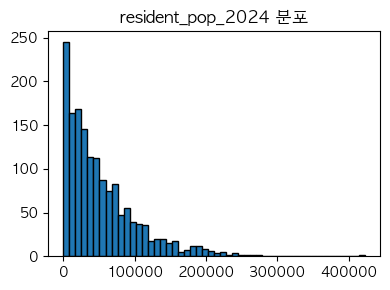

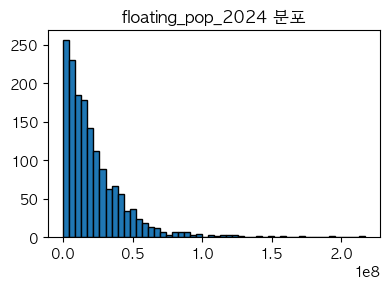

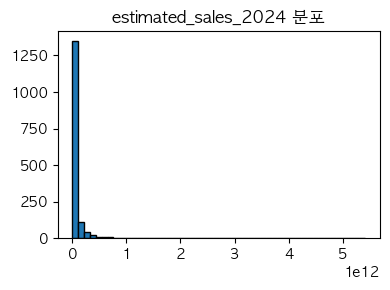

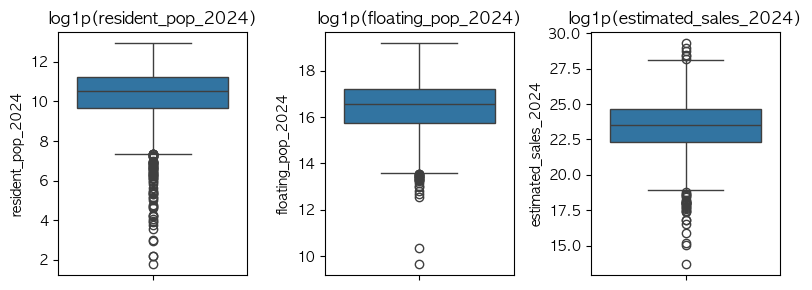

In [17]:
# 일반 히스토그램 ------------------------------------------------------
for m in metrics:
    plt.figure(figsize=(4,3))
    plt.hist(df[m], bins=50, edgecolor="k")
    plt.title(f"{m} 분포"); plt.tight_layout(); plt.show()

# 로그 변환 & 박스플롯 -------------------------------------------------
plt.figure(figsize=(8,3))
for i, m in enumerate(metrics, 1):
    plt.subplot(1,3,i)
    sns.boxplot(y=np.log1p(df[m]))
    plt.title(f"log1p({m})")
plt.tight_layout(); plt.show()


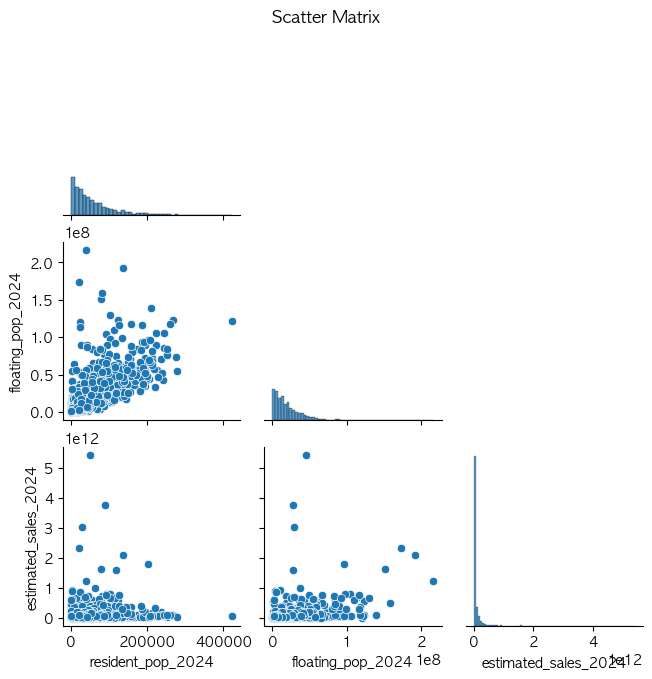

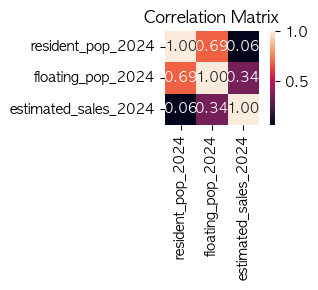

In [18]:
# PairPlot ------------------------------------------------------------
sns.pairplot(df[metrics], diag_kind="hist", corner=True, height=2.2)
plt.suptitle("Scatter Matrix", y=1.02); plt.show()

# Heatmap -------------------------------------------------------------
plt.figure(figsize=(4,3))
sns.heatmap(df[metrics].corr(), annot=True, fmt=".2f", square=True)
plt.title("Correlation Matrix"); plt.tight_layout(); plt.show()


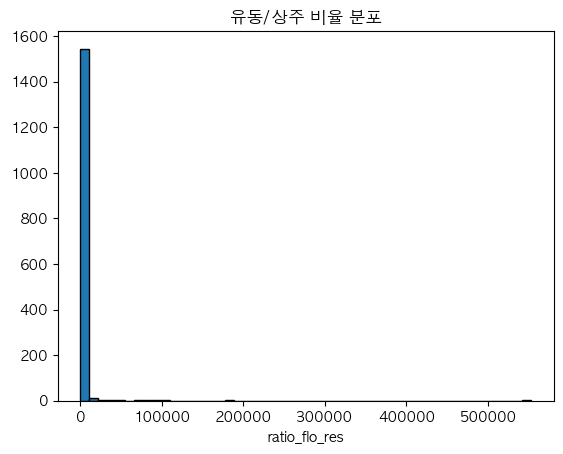

,상권_코드,resident_pop_2024,floating_pop_2024,ratio_flo_res
1071,3120025,5,2766230,553246.000000
1537,3130289,8,1422346,177793.250000
1307,3130025,19,2018216,106221.894737
1297,3130009,18,1746782,97043.444444
1548,3130304,8,662571,82821.375000
1106,3120060,102,7005320,68679.607843
1299,3130012,34,1592932,46850.941176
1315,3130046,42,1879854,44758.428571
1306,3130024,1302,54476927,41840.957757
108,3110108,66,2608752,39526.545455


In [19]:
df["ratio_flo_res"] = df["floating_pop_2024"] / df["resident_pop_2024"]

plt.hist(df["ratio_flo_res"], bins=50, edgecolor="k")
plt.title("유동/상주 비율 분포"); plt.xlabel("ratio_flo_res"); plt.show()

display(
    df.nlargest(10, "ratio_flo_res")
      [["상권_코드", "resident_pop_2024", "floating_pop_2024", "ratio_flo_res"]]
)
